In [12]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

***Linear Regression (Tested vs Case)***

[348.11410929 116.39012952 235.47408798 131.3400637   -4.62701007
  -8.75112985 112.91040347 272.20452971  56.07487784  37.25858137
  -7.97785739]


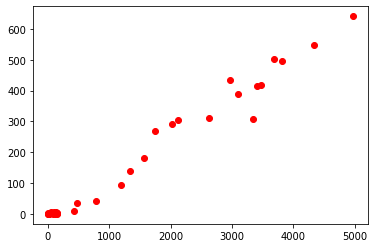

In [13]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv', parse_dates = ['Date'])
dataset
testVSCase = dataset[['Tested','Case']].sort_values('Tested')
test = testVSCase.iloc[:,:-1].values
# print(test)
case = testVSCase.iloc[:,1].values
# print(case)

from sklearn.model_selection import train_test_split

test_train,test_test, case_train, case_test = train_test_split(test,case, test_size = 0.2, random_state = 0)
# print(test_train)
# print(case_train)
# print(test_test)
# print(case_test)
plt.scatter(test_train,case_train, color='red')

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(test_train,case_train)
case_pred = regressor.predict(test_test)
print(case_pred)

In [14]:
case_pred = regressor.predict([[3812]])
case_pred

array([481.24585072])

***MLPRegression Model (Time Series Vs All)***

             Case  Death  Recovered  Tested
Date                                       
2020-04-30   7517    180        168   63302
2020-05-01   7989    192        177   67273
2020-05-02   8462    203        187   71244
2020-05-03   8935    215        197   75215
2020-05-04   9407    226        207   79187
2020-05-05   9880    238        216   83158
2020-05-06  10353    249        226   87129


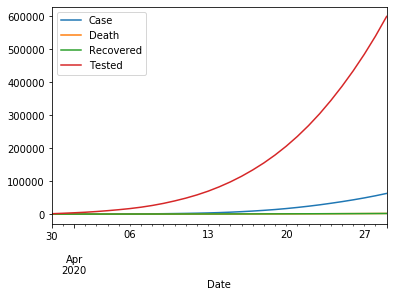

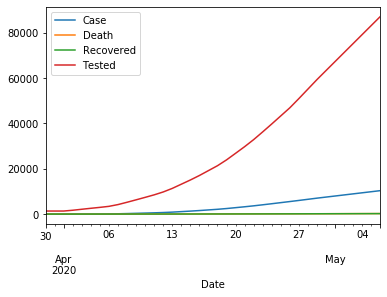

In [15]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
accumulated_count = dataset.cumsum()
x = np.arange(len(dataset)).reshape(-1, 1)
# print(X)
y = dataset.values
# print(y)
# data = data[22:]

from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
regressor.fit(x, y)


test = np.arange(len(dataset)+7).reshape(-1, 1)
pred = regressor.predict(test)
prediction = pred.round().astype(int)
# print(prediction)
import datetime as datetime
import dateutil.parser
week = [dataset.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(dt_idx,name="Date")
# print(predicted_count)
dataFrmae = pd.DataFrame(prediction, columns = ['Case','Day','Death','Recovered','Tested'])

prediction_value = pd.concat([dataFrmae,predicted_count], axis=1)
prediction_value = prediction_value.drop(['Day'], axis=1)
prediction_value.set_index('Date',inplace = True)
accumulated_count = accumulated_count.drop(['Day'], axis=1)
prediction_value.index = pd.to_datetime(prediction_value.index)

accumulated_count.plot()
prediction_value.plot()

updateDateTime = datetime.datetime.now().strftime('%Y-%m-%d')
prediction_value = prediction_value[prediction_value.index >= dateutil.parser.parse(updateDateTime)]
print(prediction_value)
# plt.title('Prediction of Accumulated Confirmed Count')
# plt.legend(['current confirmd count', 'predicted confirmed count'])
# plt.show()

***ARIMA Algorithm***

In [16]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
accumulated_count = dataset.cumsum()
model_case = ARIMA(dataset['Case'].values, order=(1, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_case = forcast_case[0].tolist()
pred_case = [round(num) for num in pred_case]
# pd.DataFrame(pred_case)


In [17]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# print(dataset['Death'].values)
model_case = ARIMA(dataset['Death'].values, order=(1, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_death = forcast_case[0].tolist()
pred_death = [round(num) for num in pred_death]
# pd.DataFrame(pred_death)

In [18]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
# print(dataset.columns)
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# print(dataset['Recovered'].values)
model_case = ARIMA(dataset['Recovered'].values, order=(2, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_Recovered = forcast_case[0].tolist()
pred_Recovered = [round(num) for num in pred_Recovered]
# pd.DataFrame(pred_Recovered)

In [19]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
# print(dataset.columns)
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# dataset = dataset.reset_index()
model_case = ARIMA(dataset['Tested'].values, order=(2, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_test = forcast_case[0].tolist()
pred_test = [round(num) for num in pred_test]
# pd.DataFrame(pred_test)

In [20]:
data = {
    "Case" : pred_case,
    "Death" : pred_death,
    "Recovered": pred_Recovered,
    "Tested" : pred_test
}
dataFrame = pd.DataFrame(data)
# print(dataFrame)
week = [dataset.index[dataset.shape[0]-1] + timedelta(days=i) for i in range(1,8)]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(dt_idx,name="Date")
prediction_value = pd.concat([dataFrame,predicted_count], axis=1)
prediction_value.set_index('Date',inplace = True)
print(prediction_value)

             Case  Death  Recovered  Tested
Date                                       
2020-04-30   7707    172        158   64811
2020-05-01   8309    181        166   69792
2020-05-02   8925    191        176   74808
2020-05-03   9558    201        186   79898
2020-05-04  10212    212        196   85091
2020-05-05  10886    222        207   90405
2020-05-06  11582    233        217   95854
